In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
sensor_pos = np.genfromtxt('Hall_sensor_positions.csv',
                           delimiter=',',
                           skip_header=1)

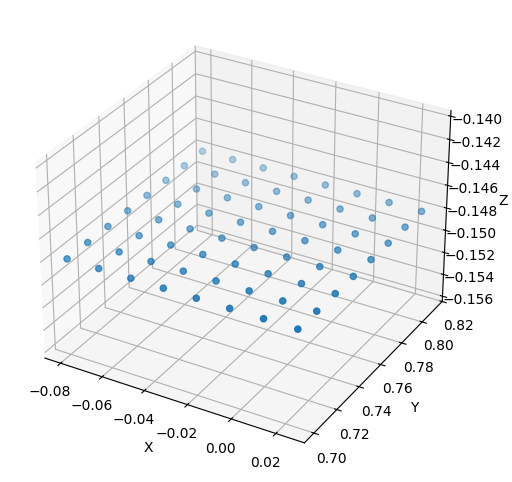

In [4]:
x = sensor_pos[:,0]
y = sensor_pos[:,1]
z = sensor_pos[:,2]

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x,y,z, )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [5]:
#set constants
mu0 = 4*np.pi * 1e-7
m = 1.0

In [6]:
def dipole_moment(alpha, beta, m=1.0):
    """
    Convert dipole orientation angles (alpha, beta) into dipole moment vector.
    alpha: elevation angle
    beta: azimuth angle
    """
    mx = np.cos(beta) * np.cos(alpha) * m
    my = np.sin(beta) * np.cos(alpha) * m
    mz = np.sin(alpha) * m
    return np.array([mx, my, mz])

In [13]:
zigzac_points = np.genfromtxt('Zig_zac_points_coordinates.csv',
                              delimiter= ',',
                              skip_header=1)

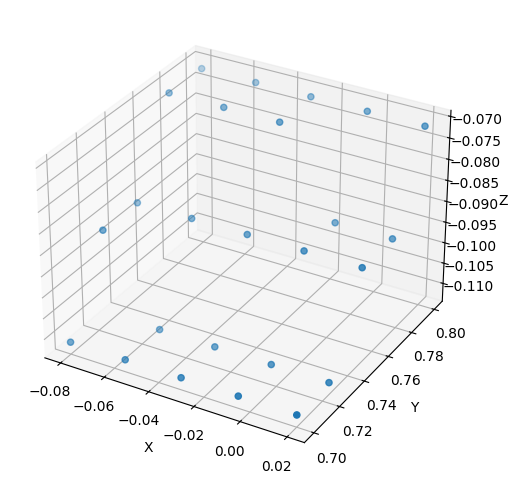

In [14]:
x_points = zigzac_points[:,0]
y_points = zigzac_points[:,1]
z_points = zigzac_points[:,2]

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_points,y_points,z_points)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [15]:
def dipole_field (source,sensor, m_vec):
    r_vec = sensor - source
    r = np.linalg.norm(r_vec) +1e-12
    m_dot_r = np.dot(m,r_vec)
    
    term1 = 3*m_dot_r *r_vec / (r**5)
    term2 = m_vec / (r**3)
    B_vec = (term1 - term2)* 1e-7
    
    return B_vec

In [16]:
def computeB_for_all_sensors(source_points, sensor_pos,m_vec):
    B_values = []
    for sensor in sensor_pos:
        B_vec = dipole_field(source_points, sensor_pos, m_vec)
        B_mag = np.linalg.norm(B_vec)
        B_values.append(B_mag)
    
    return np.array(B_values)

In [18]:
alpha = 0.0
beta = 0.0
m_vec = dipole_moment(alpha,beta)

outputs = []
for src in zigzac_points:
    B_all = computeB_for_all_sensors(src, sensor_pos, m_vec)
    outputs.append(B_all)
    
outputs = np.array(outputs)

In [19]:
np.savetxt("B_output.csv", outputs, delimiter = ",")